# Hurricane Helene Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline


In [3]:
# Load the provided dataset
df = pd.read_csv("Hurricane_Helene_Plot_Data.csv", parse_dates=['Date Time'])
df.set_index('Date Time', inplace=True)


In [4]:
colors = ['red', 'blue', 'green', 'darkorange', 'purple']
labels = ['5 min', '10 min', '15 min', '30 min', '1 hour']
column_keys = ['5min', '10min', '15min', '30min', '60min']
tendency_columns = [
    df['Pressure_Tendency_5min'],
    df['Pressure_Tendency_10min'],
    df['Pressure_Tendency_15min'],
    df['Pressure_Tendency_30min'],
    df['Pressure_Tendency_60min']
]


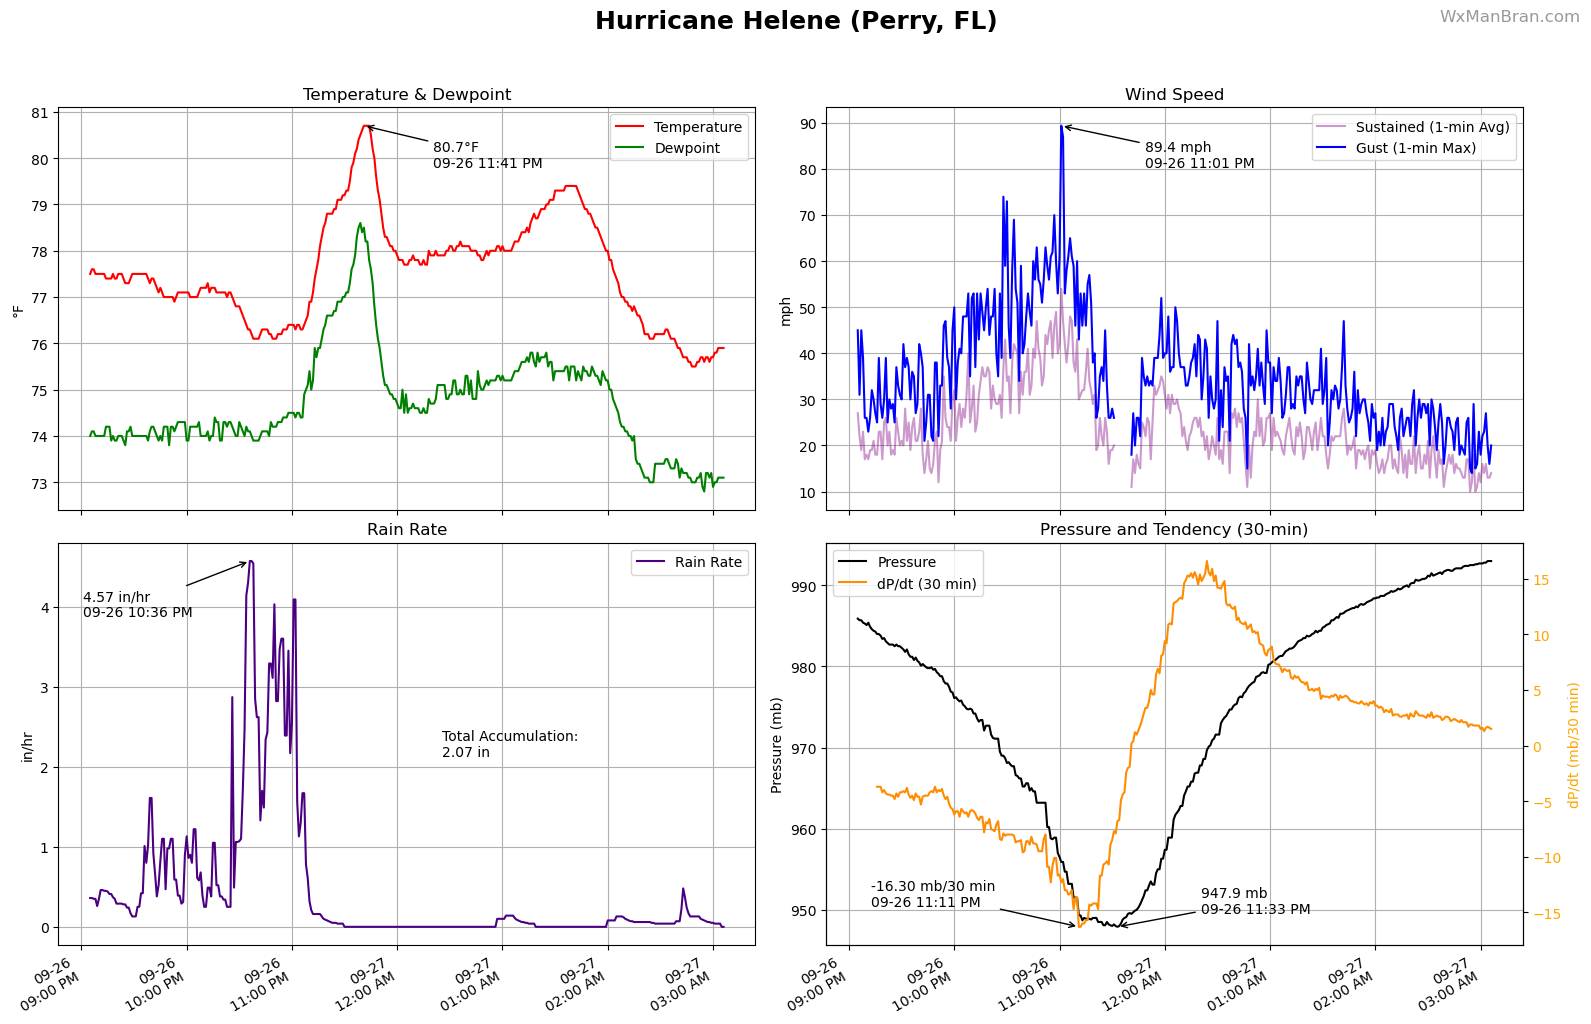

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the dataset and ensure datetime index
df = pd.read_csv("Hurricane_Helene_Plot_Data.csv", parse_dates=['Date Time'])
df.set_index('Date Time', inplace=True)

# Create figure
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)

# === 1. Temperature & Dewpoint ===
axs[0, 0].plot(df.index, df['Temp'], color='red', label='Temperature')
axs[0, 0].plot(df.index, df['Dew'], color='green', label='Dewpoint')

max_temp = df['Temp'].max()
max_temp_time = df['Temp'].idxmax()
axs[0, 0].annotate(f'{max_temp:.1f}°F\n{max_temp_time.strftime("%m-%d %I:%M %p")}',
                   xy=(max_temp_time, max_temp), xytext=(50, -30), textcoords='offset points',
                   arrowprops=dict(arrowstyle='->', color='black'), color='black')

axs[0, 0].set_title('Temperature & Dewpoint')
axs[0, 0].set_ylabel('°F')
axs[0, 0].legend(loc='upper right')
axs[0, 0].grid(True)

# === 2. Rain Rate ===
axs[1, 0].plot(df.index, df['Rain Rate'], color='indigo', label='Rain Rate')
max_rain = df['Rain Rate'].max()
max_rain_time = df['Rain Rate'].idxmax()
axs[1, 0].annotate(f'{max_rain:.2f} in/hr\n{max_rain_time.strftime("%m-%d %I:%M %p")}',
                   xy=(max_rain_time, max_rain), xytext=(-120, -40), textcoords='offset points',
                   arrowprops=dict(arrowstyle='->', color='black'), color='black')

total_accum = df['Rain Accum (1 min)'].sum()
axs[1, 0].text(0.55, 0.5, f'Total Accumulation:\n{total_accum:.2f} in',
               transform=axs[1, 0].transAxes,
               verticalalignment='center', horizontalalignment='left',
               fontsize=10, color='black')

axs[1, 0].set_title('Rain Rate')
axs[1, 0].set_ylabel('in/hr')
axs[1, 0].legend(loc='upper right')
axs[1, 0].grid(True)

# === 3. Wind Speed (Sustained + Gusts) ===
axs[0, 1].plot(df.index, df['Wind Speed'], color='purple', alpha=0.4, label='Sustained (1-min Avg)')
axs[0, 1].plot(df.index, df['Hi Speed'], color='blue', label='Gust (1-min Max)')

max_wind = df['Hi Speed'].max()
max_wind_time = df['Hi Speed'].idxmax()
axs[0, 1].annotate(f'{max_wind:.1f} mph\n{max_wind_time.strftime("%m-%d %I:%M %p")}',
                   xy=(max_wind_time, max_wind), xytext=(60, -30), textcoords='offset points',
                   arrowprops=dict(arrowstyle='->', color='black'), color='black')

axs[0, 1].set_title('Wind Speed')
axs[0, 1].set_ylabel('mph')
axs[0, 1].legend(loc='upper right')
axs[0, 1].grid(True)

# === 4. Pressure + 30-min Tendency ===
ax_pres = axs[1, 1]
ax_pres.plot(df.index, df['Bar'], color='black', label='Pressure')

min_pres = df['Bar'].min()
min_pres_time = df['Bar'].idxmin()
ax_pres.annotate(f'{min_pres:.1f} mb\n{min_pres_time.strftime("%m-%d %I:%M %p")}',
                 xy=(min_pres_time, min_pres), xytext=(60, 10), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'), color='black')

ax_pres.set_title('Pressure and Tendency (30-min)')
ax_pres.set_ylabel('Pressure (mb)', color='black')
ax_pres.tick_params(axis='y', labelcolor='black')
ax_pres.grid(True)

# Overlay Pressure Tendency (30-min)
ax_tend = ax_pres.twinx()
tend_line = ax_tend.plot(df.index, df['Pressure_Tendency_30min'],
                         color='darkorange', linestyle='-', label='dP/dt (30 min)')[0]

min_tend = df['Pressure_Tendency_30min'].min()
min_tend_time = df['Pressure_Tendency_30min'].idxmin()
ax_tend.annotate(f'{min_tend:.2f} mb/30 min\n{min_tend_time.strftime("%m-%d %I:%M %p")}',
                 xy=(min_tend_time, min_tend), xytext=(-150, 15), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'), color='black')

ax_tend.set_ylabel('dP/dt (mb/30 min)', color='orange')
ax_tend.tick_params(axis='y', labelcolor='orange')
ax_tend.grid(False)

# Combine legends from both y-axes
pres_line = ax_pres.lines[0]  # pressure line
lines = [pres_line, tend_line]
labels = [line.get_label() for line in lines]
ax_pres.legend(lines, labels, loc='upper left')

# Format shared x-axis
for ax in [axs[1, 0], axs[1, 1]]:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
 
# Gray site watermark aligned with the suptitle to persist in saved images\n",
fig.text(0.99, 0.98, 'WxManBran.com', ha='right', va='top', fontsize=12, color='gray', alpha=0.8, transform=fig.transFigure)

fig.suptitle('Hurricane Helene (Perry, FL)', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.autofmt_xdate()

# ✅ Turn off all minor ticks for every subplot
for ax in axs.flat:
    ax.minorticks_off()

# ✅ Also turn off for the pressure tendency twinx axis
ax_tend.minorticks_off()


plt.savefig("Hurricane_Helene_MultiPanel.png", dpi=300, bbox_inches='tight')
plt.show()

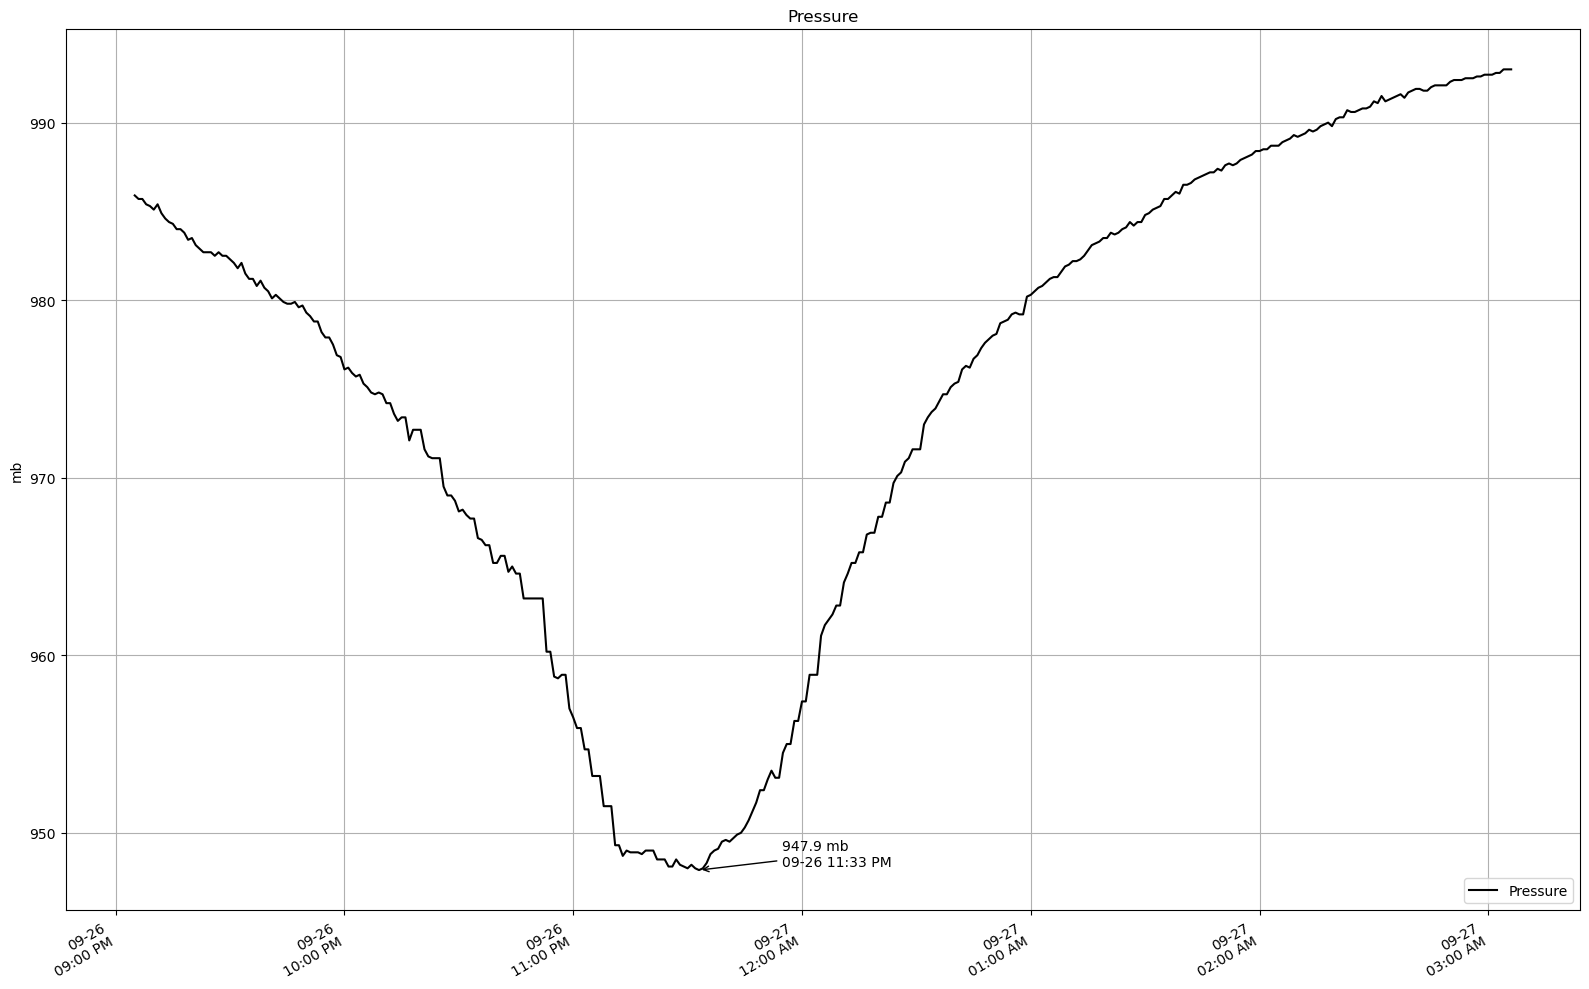

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Example: Assuming df is already defined and datetime-indexed

fig, ax1 = plt.subplots(1, 1, figsize=(16, 10), sharex=True)

# Plot pressure
ax1.plot(df.index, df['Bar'], color='black', label='Pressure')
ax1.legend(loc='lower right')
ax1.set_title('Pressure')
ax1.set_ylabel('mb')
ax1.grid(True)

# Annotate minimum pressure
min_pressure = df['Bar'].min()
min_time = df['Bar'].idxmin()
ax1.annotate(f'{min_pressure:.1f} mb\n{min_time.strftime("%m-%d %I:%M %p")}',
             xy=(min_time, min_pressure), xytext=(60, 3), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'), color='black')

# Format x-axis to 12-hour time with line breaks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
fig.autofmt_xdate()

plt.tight_layout()

plt.savefig("Hurricane_Helene_MSLP.png", dpi=300, bbox_inches='tight')
plt.show()

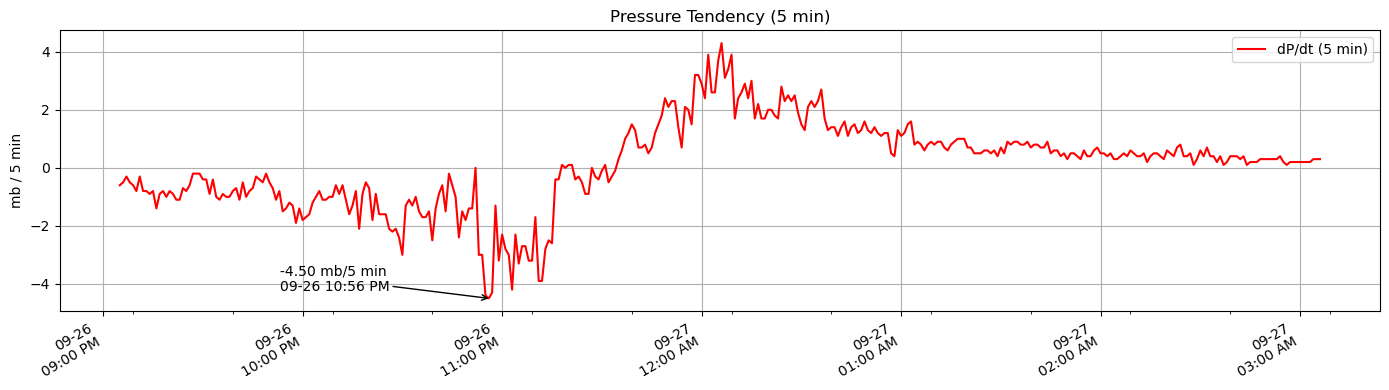

In [7]:
col = df['Pressure_Tendency_5min']
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(col.index, col, linestyle='-', color='red', label='dP/dt (5 min)')
min_val = col.min()
min_time = col.idxmin()
ax.annotate(f'{min_val:.2f} mb/5 min\n{min_time.strftime("%m-%d %I:%M %p")}',
            xy=(min_time, min_val), xytext=(-150, 5), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', shrinkA=0, shrinkB=0), color='black')
ax.set_title('Pressure Tendency (5 min)')
ax.set_ylabel('mb / 5 min')

ax.legend(loc='upper right')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
ax.tick_params(axis='x', rotation=0)
ax.grid(True)
fig.autofmt_xdate()  # rotates and aligns x-axis labels

plt.tight_layout()

plt.savefig("Hurricane_Helene_PTendency_5min.png", dpi=300, bbox_inches='tight')
plt.show()

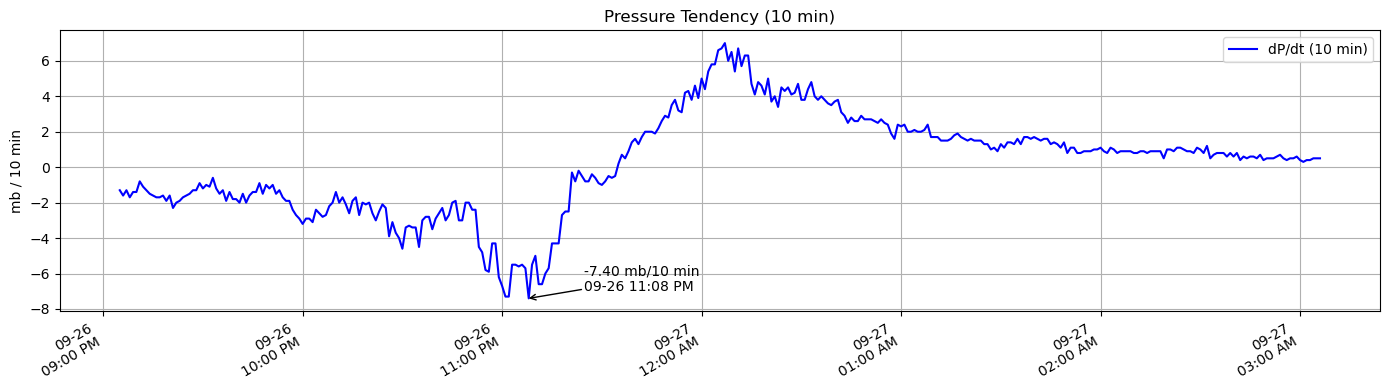

In [8]:
col = df['Pressure_Tendency_10min']
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(col.index, col, linestyle='-', color='blue', label='dP/dt (10 min)')
min_val = col.min()
min_time = col.idxmin()
ax.annotate(f'{min_val:.2f} mb/10 min\n{min_time.strftime("%m-%d %I:%M %p")}',
            xy=(min_time, min_val), xytext=(40, 5), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', shrinkA=0, shrinkB=0), color='black')
ax.set_title('Pressure Tendency (10 min)')
ax.set_ylabel('mb / 10 min')

ax.legend(loc='upper right')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
ax.tick_params(axis='x', rotation=0)
ax.grid(True)
ax.minorticks_off()
fig.autofmt_xdate()  # rotates and aligns x-axis labels

plt.tight_layout()

plt.savefig("Hurricane_Helene_PTendency_10min.png", dpi=300, bbox_inches='tight')
plt.show()

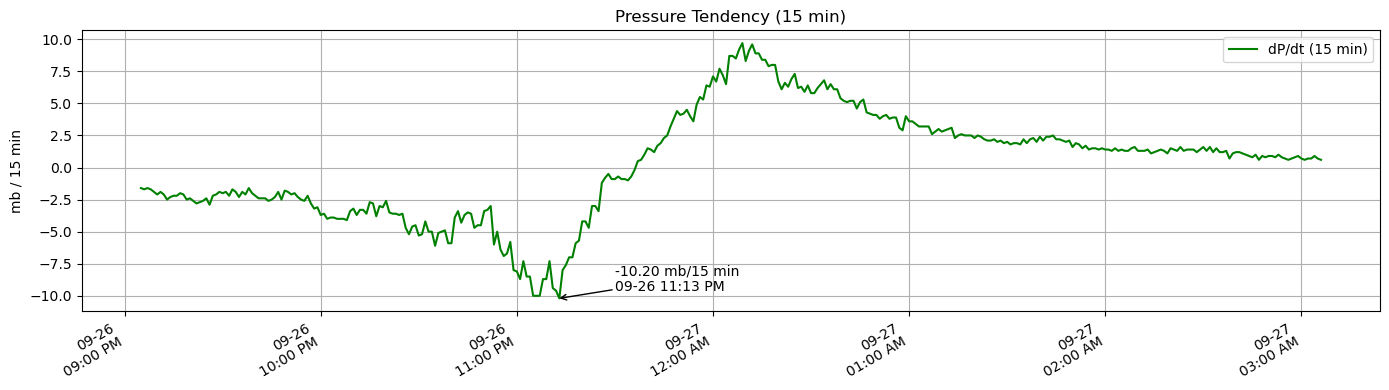

In [9]:
col = df['Pressure_Tendency_15min']
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(col.index, col, linestyle='-', color='green', label='dP/dt (15 min)')
min_val = col.min()
min_time = col.idxmin()
ax.annotate(f'{min_val:.2f} mb/15 min\n{min_time.strftime("%m-%d %I:%M %p")}',
            xy=(min_time, min_val), xytext=(40, 5), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', shrinkA=0, shrinkB=0), color='black')
ax.set_title('Pressure Tendency (15 min)')
ax.set_ylabel('mb / 15 min')

ax.legend(loc='upper right')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
ax.tick_params(axis='x', rotation=0)
ax.grid(True)
ax.minorticks_off()
fig.autofmt_xdate()  # rotates and aligns x-axis labels

plt.tight_layout()

plt.savefig("Hurricane_Helene_PTendency_15min.png", dpi=300, bbox_inches='tight')
plt.show()

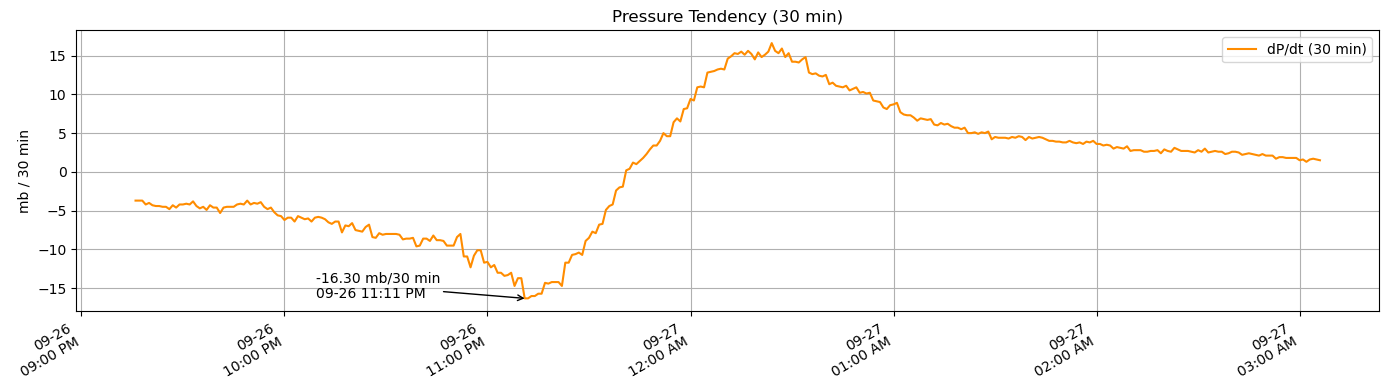

In [10]:
col = df['Pressure_Tendency_30min']
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(col.index, col, linestyle='-', color='darkorange', label='dP/dt (30 min)')
min_val = col.min()
min_time = col.idxmin()
ax.annotate(f'{min_val:.2f} mb/30 min\n{min_time.strftime("%m-%d %I:%M %p")}',
            xy=(min_time, min_val), xytext=(-150, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', shrinkA=0, shrinkB=0), color='black')
ax.set_title('Pressure Tendency (30 min)')
ax.set_ylabel('mb / 30 min')

ax.legend(loc='upper right')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
ax.tick_params(axis='x', rotation=0)
ax.grid(True)
ax.minorticks_off()
fig.autofmt_xdate()  # rotates and aligns x-axis labels


plt.tight_layout()

plt.savefig("Hurricane_Helene_PTendency_30min.png", dpi=300, bbox_inches='tight')
plt.show()

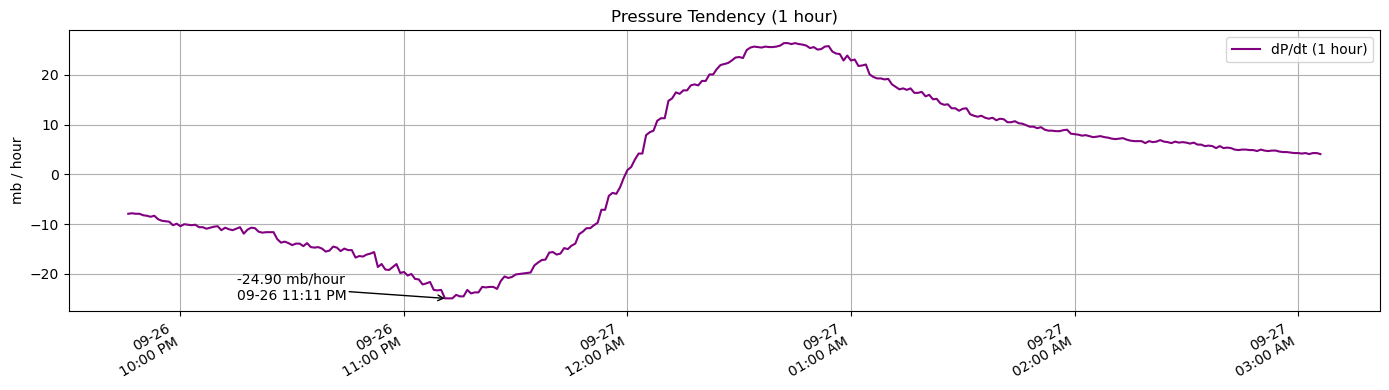

In [11]:
col = df['Pressure_Tendency_60min']
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(col.index, col, linestyle='-', color='purple', label='dP/dt (1 hour)')
min_val = col.min()
min_time = col.idxmin()
ax.annotate(f'{min_val:.2f} mb/hour\n{min_time.strftime("%m-%d %I:%M %p")}',
            xy=(min_time, min_val), xytext=(-150, -1), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', shrinkA=0, shrinkB=0), color='black')
ax.set_title('Pressure Tendency (1 hour)')
ax.set_ylabel('mb / hour')

ax.legend(loc='upper right')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
ax.tick_params(axis='x', rotation=0)
ax.grid(True)
ax.minorticks_off()
fig.autofmt_xdate()  # rotates and aligns x-axis labels

plt.tight_layout()

plt.savefig("Hurricane_Helene_PTendency_1hour.png", dpi=300, bbox_inches='tight')
plt.show()

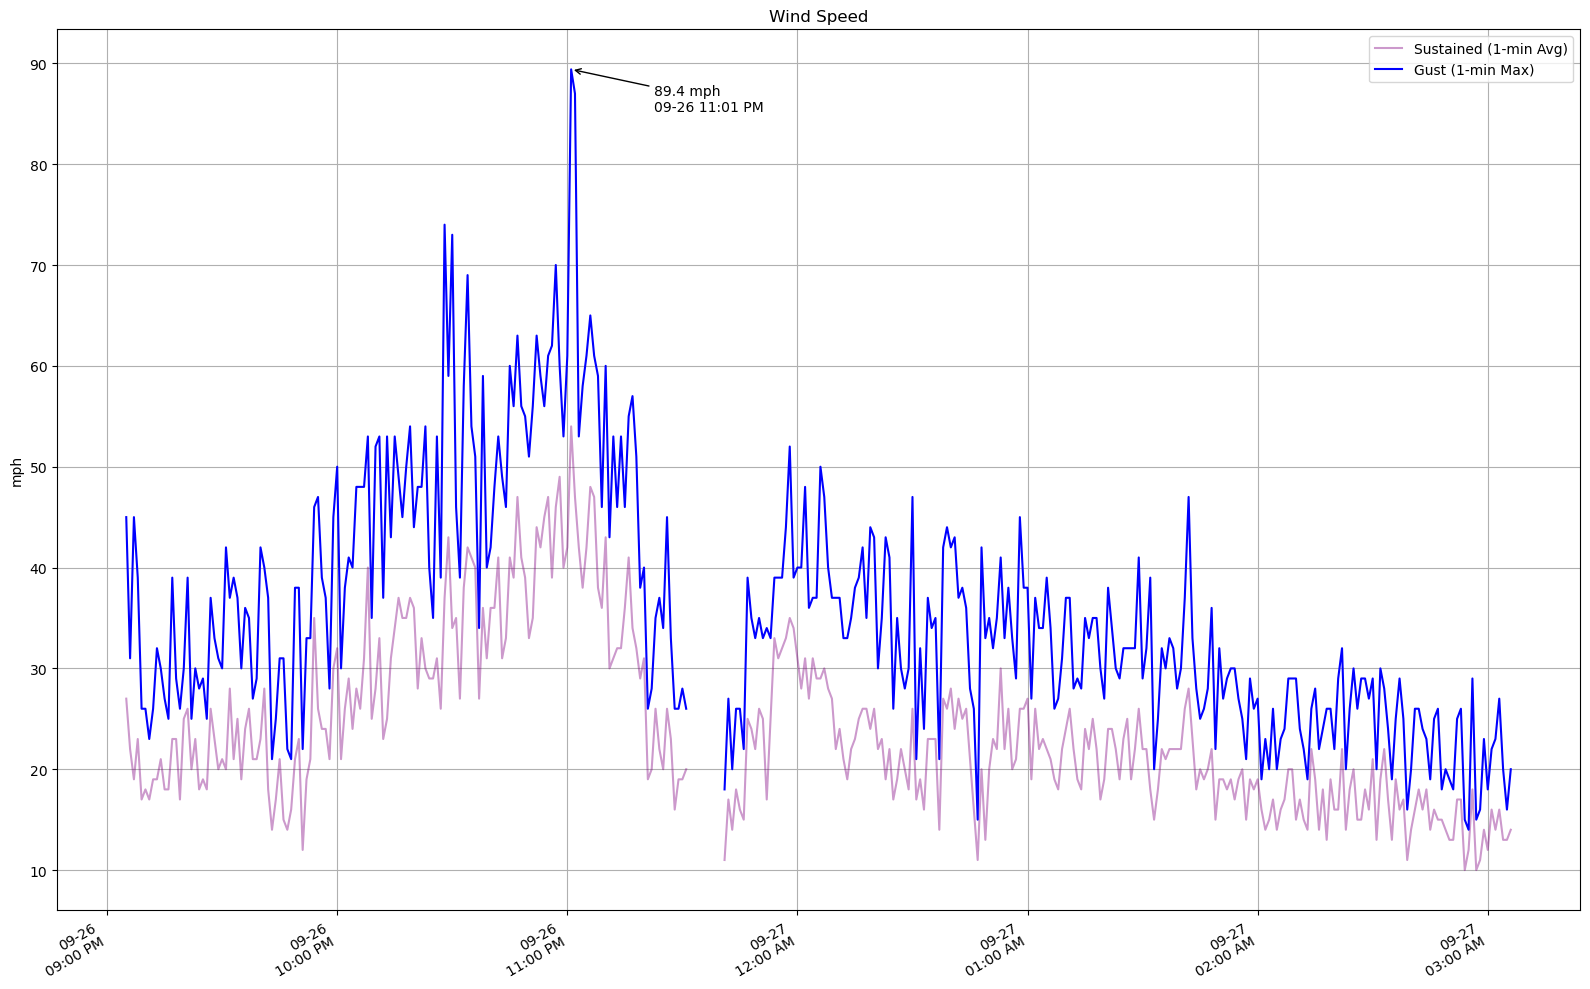

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load Helene data
df = pd.read_csv("Hurricane_Helene_Plot_Data.csv", parse_dates=['Date Time'])
df.set_index('Date Time', inplace=True)

# Plot wind data
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(df.index, df['Wind Speed'], color='purple', alpha=0.4, label='Sustained (1-min Avg)')
ax.plot(df.index, df['Hi Speed'], color='blue', label='Gust (1-min Max)')

# Annotate max gust
max_gust = df['Hi Speed'].max()
max_time = df['Hi Speed'].idxmax()
ax.annotate(f'{max_gust:.1f} mph\n{max_time.strftime("%m-%d %I:%M %p")}',
            xy=(max_time, max_gust), xytext=(60, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'), color='black')

ax.set_title('Wind Speed')
ax.set_ylabel('mph')
ax.legend(loc='upper right')
ax.grid(True)
ax.minorticks_off()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig("Hurricane_Helene_WindSpeed.png", dpi=300, bbox_inches='tight')
plt.show()


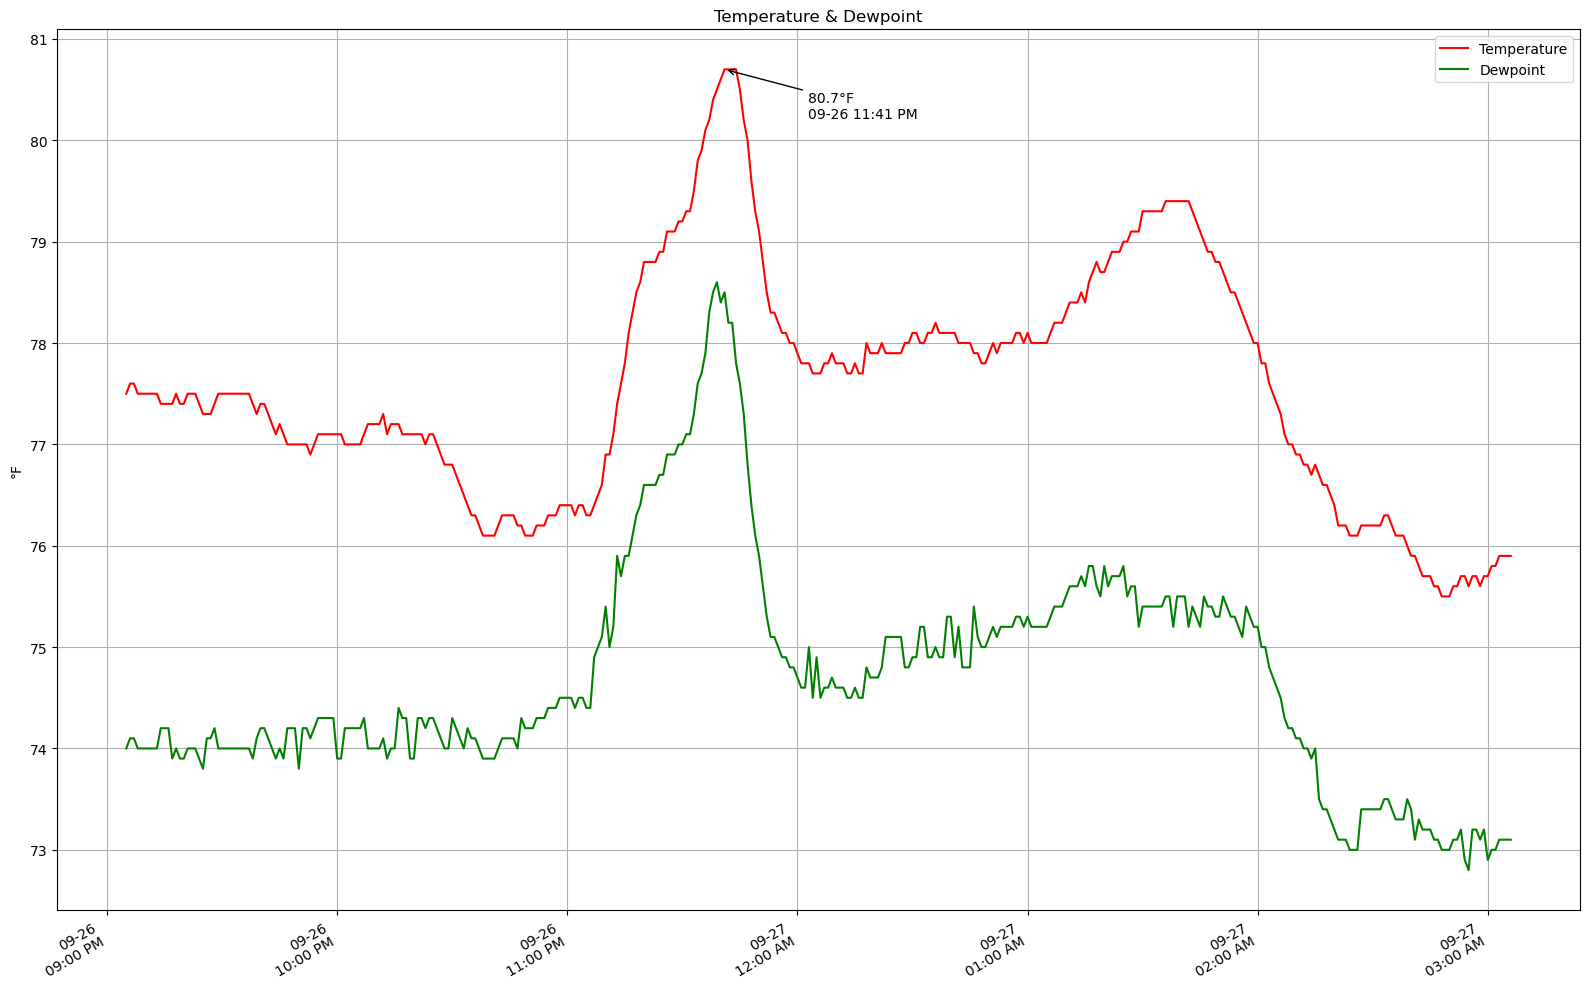

In [13]:
df = pd.read_csv("Hurricane_Helene_Plot_Data.csv", parse_dates=['Date Time'])
df.set_index('Date Time', inplace=True)

fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(df.index, df['Temp'], color='red', label='Temperature')
ax.plot(df.index, df['Dew'], color='green', label='Dewpoint')

max_temp = df['Temp'].max()
max_temp_time = df['Temp'].idxmax()
ax.annotate(f'{max_temp:.1f}°F\n{max_temp_time.strftime("%m-%d %I:%M %p")}',
            xy=(max_temp_time, max_temp), xytext=(60, -35), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'), color='black')

ax.set_title('Temperature & Dewpoint')
ax.set_ylabel('°F')
ax.legend(loc='upper right')
ax.grid(True)
ax.minorticks_off()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig("Hurricane_Helene_Temp_Dew.png", dpi=300, bbox_inches='tight')
plt.show()


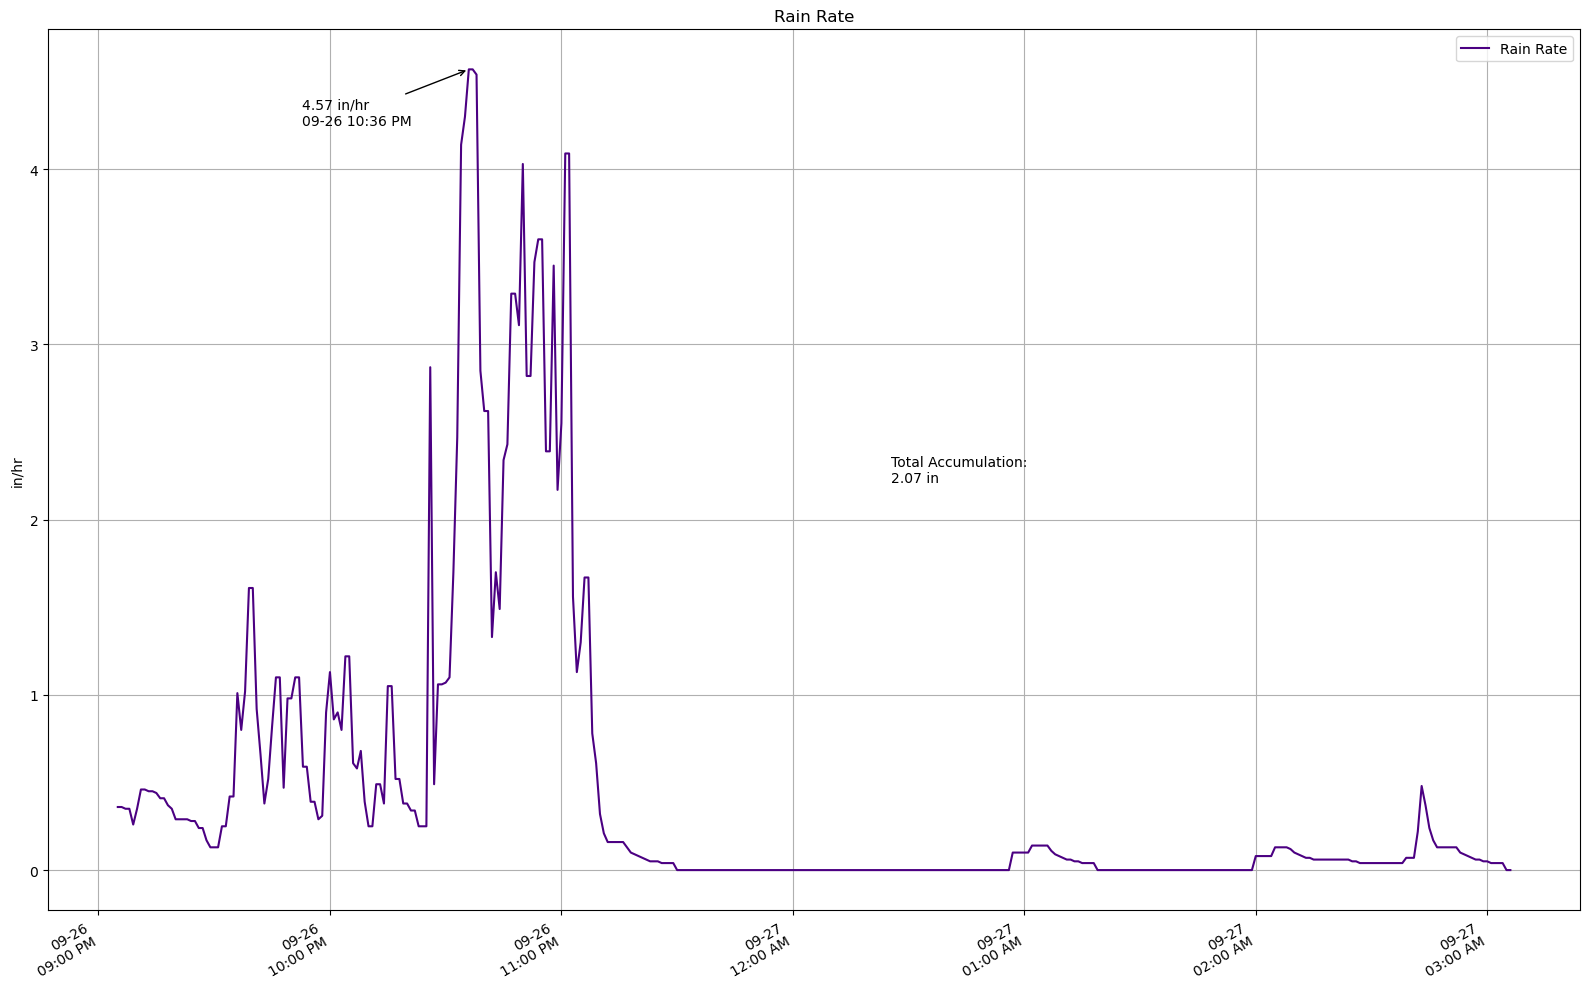

In [14]:
df = pd.read_csv("Hurricane_Helene_Plot_Data.csv", parse_dates=['Date Time'])
df.set_index('Date Time', inplace=True)

fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(df.index, df['Rain Rate'], color='indigo', label='Rain Rate')

max_rain = df['Rain Rate'].max()
max_rain_time = df['Rain Rate'].idxmax()
ax.annotate(f'{max_rain:.2f} in/hr\n{max_rain_time.strftime("%m-%d %I:%M %p")}',
            xy=(max_rain_time, max_rain), xytext=(-120, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'), color='black')

total_accum = df['Rain Accum (1 min)'].sum()
ax.text(0.55, 0.5, f'Total Accumulation:\n{total_accum:.2f} in',
        transform=ax.transAxes, verticalalignment='center', horizontalalignment='left',
        fontsize=10, color='black')

ax.set_title('Rain Rate')
ax.set_ylabel('in/hr')
ax.legend(loc='upper right')
ax.grid(True)
ax.minorticks_off()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%I:%M %p'))
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig("Hurricane_Helene_RainRate.png", dpi=300, bbox_inches='tight')
plt.show()
